# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tickets=pd.read_csv('Predict Price of Airline Tickets.csv')

## Take a Quick Look at the Data Structure

In [3]:
tickets.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
tickets['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [6]:
tickets['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
tickets['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [8]:
tickets.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### 3shan kol 7aga object fa lazm a8irha w a2smha 3sahn a3rf a3ml prediction mazbot awl 7aga Dep_Time

In [9]:
tickets['Dep_hour']=pd.to_datetime(tickets['Dep_Time']).dt.hour

In [10]:
tickets['Dep_min']=pd.to_datetime(tickets['Dep_Time']).dt.minute

In [11]:
tickets.drop(['Dep_Time'],axis=1,inplace=True)

In [12]:
tickets.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,16,50


## Arrival_Time

In [13]:
#hours
tickets['Arrival_hour']=pd.to_datetime(tickets.Arrival_Time).dt.hour
#minutes
tickets['Arrival_min']=pd.to_datetime(tickets.Arrival_Time).dt.minute
#drop Arrival_Time
tickets.drop(["Arrival_Time"], axis = 1, inplace = True)

In [14]:
tickets.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,16,50,21,35


## Duration

In [15]:
duration = list(tickets["Duration"])

for i in range(len(duration)):
    
    if "h" in duration[i]:
        duration[i]=duration[i].strip()+" 0m"
    else:
        duration[i]= "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [16]:
#hours
tickets["Duration_hours"] = duration_hours
#mins
tickets["Duration_mins"] = duration_mins

In [17]:
tickets.drop(["Duration"], axis = 1, inplace = True)

In [18]:
tickets.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,16,50,21,35,4,45


### nafs el 7aga h3mlo fe Date_of_Journey

In [19]:
#day
tickets['Journey_day']=pd.to_datetime(tickets.Date_of_Journey,format="%d/%m/%Y").dt.day
#month
tickets['Journey_month']=pd.to_datetime(tickets.Date_of_Journey,format="%d/%m/%Y").dt.month
#drop Date_of_Journey
tickets.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [20]:
tickets.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,22,20,1,10,2,50,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,50,13,15,7,25,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,25,4,25,19,0,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,18,5,23,30,5,25,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,16,50,21,35,4,45,1,3


## handling categorical data
Nominal data => data are not in any order => OneHotEncoder is used in this case

Ordinal data => data are in order => LabelEncoder is used in this case

awl 7aga 3ndy el airline dah nominal data fa h3mlo onehotencoder 

## hn3ml encode awl 7aga l Airline

In [21]:
tickets["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
airline_code=tickets['Airline']
airline_code=pd.get_dummies(airline_code,drop_first=True)
airline_code.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


tany 7aga 3ndy el source nafs el klam

## hn3ml encode  l Source

In [23]:
tickets["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [24]:
source_code=tickets['Source']
source_code=pd.get_dummies(source_code,drop_first=True)
source_code.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


a5r 7aga el destination

## hn3ml encode l Source

In [25]:
tickets["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
destination_code=tickets['Destination']
destination_code=pd.get_dummies(destination_code,drop_first=True)
destination_code.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


## hn3ml replace l Total_Stops

In [27]:
tickets["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
tickets['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [29]:
tickets.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [30]:
tickets.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0.0,No info,3897,22,20,1,10,2,50,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2.0,No info,7662,5,50,13,15,7,25,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2.0,No info,13882,9,25,4,25,19,0,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1.0,No info,6218,18,5,23,30,5,25,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1.0,No info,13302,16,50,21,35,4,45,1,3


## dlw2ty hnzwod hnshof el data w nzwd el 7agat ely 3mnlha encode

In [31]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      10682 non-null  float64
 5   Additional_Info  10683 non-null  object 
 6   Price            10683 non-null  int64  
 7   Dep_hour         10683 non-null  int64  
 8   Dep_min          10683 non-null  int64  
 9   Arrival_hour     10683 non-null  int64  
 10  Arrival_min      10683 non-null  int64  
 11  Duration_hours   10683 non-null  int64  
 12  Duration_mins    10683 non-null  int64  
 13  Journey_day      10683 non-null  int64  
 14  Journey_month    10683 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 1.2+ MB


In [32]:
tickets= pd.concat([tickets, airline_code, source_code, destination_code], axis = 1)

In [33]:
tickets.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,BLR ? DEL,0.0,No info,3897,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2.0,No info,7662,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2.0,No info,13882,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1.0,No info,6218,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1.0,No info,13302,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [34]:
#n drop hna el 7agat ely msh m7tgnha w asln 3amla encode behom
tickets.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [35]:
tickets.head()

,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR ? DEL,0.0,No info,3897,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,CCU ? IXR ? BBI ? BLR,2.0,No info,7662,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,DEL ? LKO ? BOM ? COK,2.0,No info,13882,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,CCU ? NAG ? BLR,1.0,No info,6218,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,BLR ? NAG ? DEL,1.0,No info,13302,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [36]:
tickets.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [37]:
tickets.head()

,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Journey_day,Journey_month,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,3897,22,20,1,10,2,50,24,3,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,5,50,13,15,7,25,1,5,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,25,4,25,19,0,9,6,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,18,5,23,30,5,25,12,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,16,50,21,35,4,45,1,3,...,0,0,0,0,0,0,0,0,0,1


leh dah mshta8lsh m3yaa 

tickets['Total_Stops'].fillna(0,inplace=True)

tickets['Total_Stops'].isnull().sum()

In [38]:
#bnshof lw fe null value 3shan azbt el data 2bl ma a train
tickets.isna().any()

Total_Stops                           True
Price                                False
Dep_hour                             False
Dep_min                              False
Arrival_hour                         False
Arrival_min                          False
Duration_hours                       False
Duration_mins                        False
Journey_day                          False
Journey_month                        False
Air India                            False
GoAir                                False
IndiGo                               False
Jet Airways                          False
Jet Airways Business                 False
Multiple carriers                    False
Multiple carriers Premium economy    False
SpiceJet                             False
Trujet                               False
Vistara                              False
Vistara Premium economy              False
Chennai                              False
Delhi                                False
Kolkata    

In [39]:
tickets.fillna(value=0, inplace=True)

In [40]:
tickets.Total_Stops=tickets.Total_Stops.astype('int64')

In [41]:
tickets.isna().any()

Total_Stops                          False
Price                                False
Dep_hour                             False
Dep_min                              False
Arrival_hour                         False
Arrival_min                          False
Duration_hours                       False
Duration_mins                        False
Journey_day                          False
Journey_month                        False
Air India                            False
GoAir                                False
IndiGo                               False
Jet Airways                          False
Jet Airways Business                 False
Multiple carriers                    False
Multiple carriers Premium economy    False
SpiceJet                             False
Trujet                               False
Vistara                              False
Vistara Premium economy              False
Chennai                              False
Delhi                                False
Kolkata    

In [42]:
tickets.columns

Index(['Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Journey_day',
       'Journey_month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [43]:
X = tickets.loc[:, ['Total_Stops', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Journey_day',
       'Journey_month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']]

In [44]:
y = tickets.iloc[:, 1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

### Training the Linear Regression model on the dataset

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lin_reg.predict(X_test)

In [48]:
lin_reg.score(X_train, y_train)

0.635781134559672

In [49]:
lin_reg.score(X_test, y_test)

0.573180771380305

ValueError: x and y must be the same size

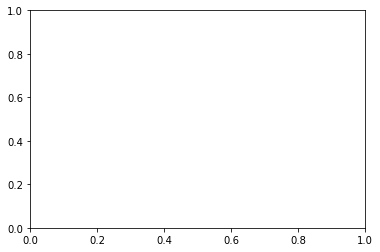

In [50]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.show()

### Calculating the error of Linear Regression

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2008.7916506278152
MSE: 9037370.656957073
RMSE: 3006.221990631609


### Training the Random Forest Regressor model on the dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = random_reg.predict(X_test)

In [56]:
random_reg.score(X_train, y_train)

0.9547243845504275

In [57]:
random_reg.score(X_test, y_test)

0.8051087807282888

### Calculating the error of Random Forest Regressor

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1197.6975854703583
MSE: 4126581.1571814376
RMSE: 2031.3988178546913


### Training the Decision Tree Regressor model on the dataset

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [61]:
y_pred = tree_reg.predict(X_test)

In [62]:
tree_reg.score(X_train, y_train)

0.9705898726971834

In [63]:
tree_reg.score(X_test, y_test)

0.7078079663710435

### Calculating the error of  Decision Tree Regressor

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1367.9614490719075
MSE: 6186805.874361905
RMSE: 2487.3290643503333
